## Initial Processing with Pandas of Dataset

### Check to make sure we're in the right directory

In [72]:
%ls

landsend_veg_2007_2012.csv  preprocess.ipynb  README.md


## Import Pandas and Matplotlib for processing + visualization

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read Data and Show first couple of columns

In [64]:
df = pd.read_csv("landsend_veg_2007_2012.csv")
df.head()

,Site-YearCode,Transect,Point,Height,Species,Plant code,Native Status,Life History,Stature
0,NUWO-2012,5,90,Low,-,-,-,-,-
1,NUWO-2012,13,150,Low,-,-,-,-,-
2,NMS-2010,8,20,Low,Achillea millefolium,ACMI,Native,Perennial,Forb
3,NMS-2010,24,4,Low,Achillea millefolium,ACMI,Native,Perennial,Forb
4,NMS-2010,48,16,Low,Achillea millefolium,ACMI,Native,Perennial,Forb


In [65]:
valid = df["Site-YearCode"] == "SUDO-2014"
df.loc[valid]

,Site-YearCode,Transect,Point,Height,Species,Plant code,Native Status,Life History,Stature
3395,SUDO-2014,28,0,L,Ambrosia chamissonis,AMCH,x,NaN,NaN


In [83]:
df["Species"]

0                              -
1                              -
2           Achillea millefolium
3           Achillea millefolium
4           Achillea millefolium
5           Achillea millefolium
6           Achillea millefolium
7           Achillea millefolium
8           Achillea millefolium
9           Achillea millefolium
10          Achillea millefolium
11          Achillea millefolium
12          Achillea millefolium
13          Achillea millefolium
14          Achillea millefolium
15          Achillea millefolium
16          Achillea millefolium
17          Achillea millefolium
18          Achillea millefolium
19          Achillea millefolium
20          Achillea millefolium
21          Achillea millefolium
22          Achillea millefolium
23          Achillea millefolium
24          Achillea millefolium
25          Achillea millefolium
26          Achillea millefolium
27          Achillea millefolium
28          Achillea millefolium
29          Achillea millefolium
          

### Sort Species by Highest -> Lowest

In [75]:
species = df[["Species"]].copy()
species["counts"] = 1
species_freq = species.groupby("Species").agg(sum).iloc[:,0].copy()
species_freq.sort(ascending=False)
species_freq

Species
Eriophyllum staechadifolium          330
Bare ground                          298
Bromus diandrus                      265
Lolium sp.                           194
Bare Ground                          152
Fragaria chiloensis                  125
Baccharis pilularis                  125
Cupressus macrocarpa                 119
Rubus ursinus                        118
Avena sp.                            112
Lupinus arboreus                      95
Briza maxima                          90
Ehrharta erecta                       73
Artemisia pycnocephala                71
Eriogonum latifolium                  65
Artemisia pycnocephala                64
Scrophularia californica              62
Lupinus chamissonis                   54
Marah fabaceus                        53
Achillea millefolium                  46
Erigeron glaucus                      44
Vulpia sp.                            43
Ambrosia chamissonis                  38
Hordeum sp.                           37
Grindeli

### Remove rows with any absent values "-"

In [77]:
df_yr_sp = df[["Site-YearCode", "Species"]]
valid = ~df_yr_sp.applymap( lambda x: x == "-").any(axis=1)
df_yr_sp = df_yr_sp.loc[valid]

### Split Site and Year into two columns

In [78]:
get_year = lambda x: int(x.split('-')[-1])
get_site = lambda x: x.split('-')[0]

df_yr_sp["year"] = df_yr_sp["Site-YearCode"].map(get_year)
df_yr_sp["site"] = df_yr_sp["Site-YearCode"].map(get_site)

df_yr_sp.drop("Site-YearCode", axis=1, inplace=True)
df_yr_sp.head()

,Species,year,site
2,Achillea millefolium,2010,NMS
3,Achillea millefolium,2010,NMS
4,Achillea millefolium,2010,NMS
5,Achillea millefolium,2010,NMS
6,Achillea millefolium,2011,NMS


### Look at Unique Species by Site and Year

In [80]:
for kk, vv in df_yr_sp.groupby(["site", "year"]):
    print(kk, vv["Species"].unique().shape[0])

(('EAPO', 2011), 31)
(('NMS', 2010), 45)
(('NMS', 2011), 35)
(('NMS', 2012), 54)
(('NUWO', 2010), 54)
(('NUWO', 2011), 25)
(('NUWO', 2012), 47)
(('SUDO', 2010), 35)
(('SUDO', 2011), 31)
(('SUDO', 2012), 41)
(('SUDO', 2013), 4)
(('SUDO', 2014), 1)
(('SUDU', 2008), 33)
(('SUDU', 2009), 40)


### Plot Frequency of Species

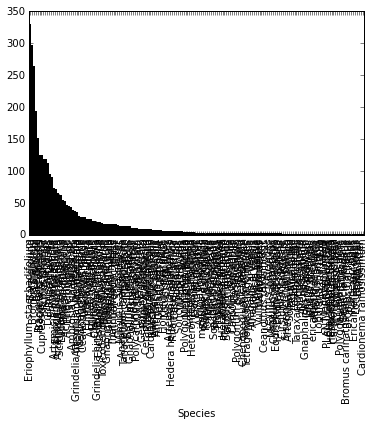

In [71]:
species_freq.plot(kind = "bar")
pass